# Mini-batch k-means

In [1]:
library(ggplot2)

In [2]:
test_data <- iris[c("Sepal.Length","Sepal.Width","Petal.Length","Petal.Width")]

In [3]:
find_closest_centers <- function(data,centers) {
    a <- as.matrix(data)
    b <- as.matrix(centers)
    aa <- as.matrix(rowSums(a^2)) %*% matrix(1,1,nrow(b))
    bb <- matrix(1,nrow(a),1) %*% t(as.matrix(rowSums(b^2)))
    ab <- a %*% t(b)
    d2 <- aa + bb - 2*ab
    closest_centers <- apply(d2,1,which.min)
    return(closest_centers)
}

![title](minibatch_algorithm.png)

In [16]:
################################
# mini-batch k-means algorithm #
################################

# X is the data matrix; rows = samples, cols = features
# k is the number of clusters
# b is the minibatch size
# epsilon is the convergence criterion
# max_iters is the max number of iters to run if no convergence

minibatch_kmeans <- function(X, k, b=10, epsilon=0.001, max_iters = 100) {

    # initialize the centers
    C <- X[sample(nrow(X),k),]

    # initialize center counts
    v <- integer(k); names(v) <- c(1:k)

    i <- 1
    delta <- epsilon
    while (i <= max_iters && delta >= epsilon) {
        sample_inds <- sample(nrow(X),b)
        M <- X[sample_inds,]
        d <- find_closest_centers(M,C)
        C_old <- C
        for (j in 1:nrow(M)) {
            x <- M[j,]
            c <- d[[rownames(x)]]
            v[c] <- v[c] + 1
            eta <- 1/v[[c]]
            C[c,] <- (1 - eta)*C[c,] + eta*x
        }
        delta <- mean(rowMeans(abs((C - C_old)/C_old)))
        i <- i + 1
    }
    print(i)
    assignments <- find_closest_centers(X,C)
    return(assignments)
}

[1] 186


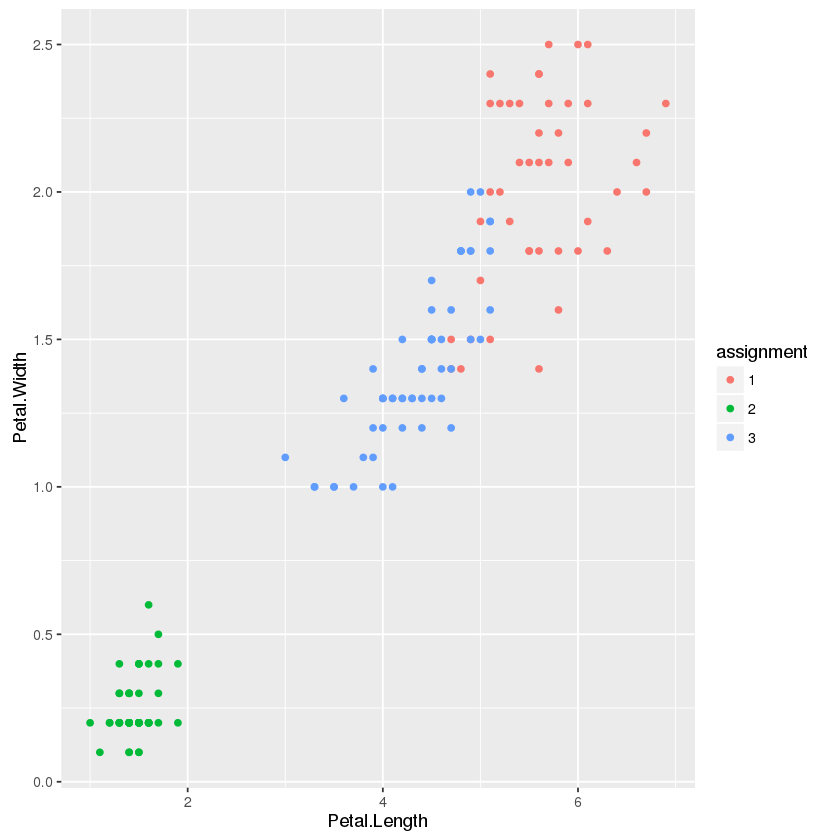

In [18]:
assignments <- minibatch_kmeans(test_data, 3, b = 25, epsilon = 0.0001, max_iters = 1000)
iris_predicted <- test_data
iris_predicted$assignment <- factor(assignments)

p2 <- ggplot(data=iris_predicted, aes(x = Petal.Length, y = Petal.Width)) + geom_point(aes(color=assignment))
p2

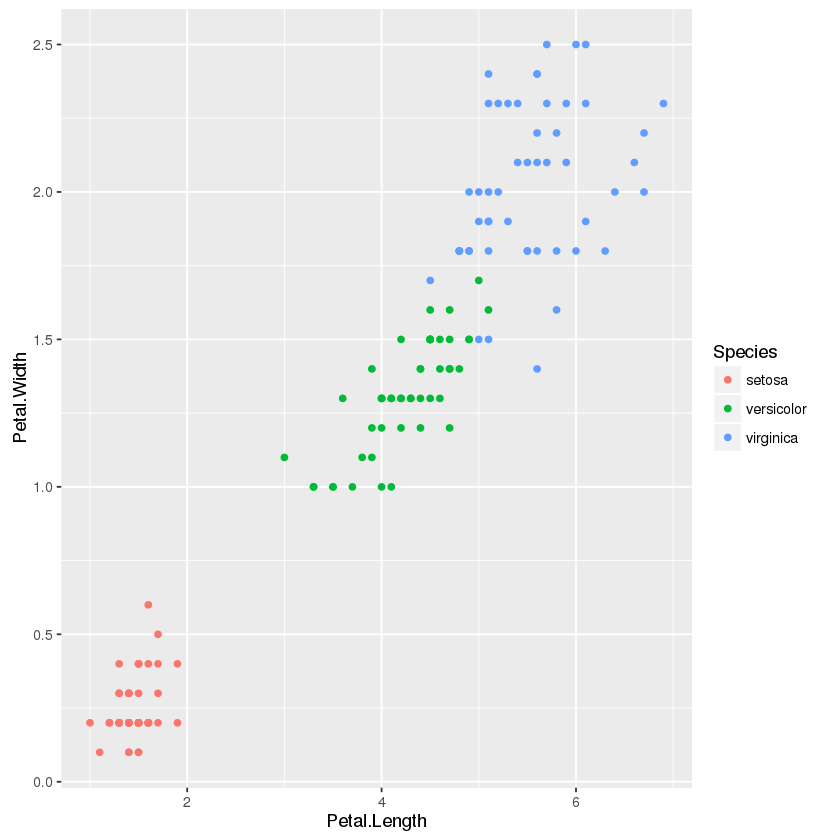

In [180]:
p <- ggplot(data=iris, aes(x = Petal.Length, y = Petal.Width)) +
    geom_point(aes(color=Species))
p

In [181]:
v

1   2   3 
461 216 323